## Problem Set 3 - 10/9/2023
### Christine Berry 

In [1]:
pip install stargazer

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Load the libraries - pybrant included! 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from statsmodels.stats.descriptivestats import describe, Description
from statsmodels.miscmodels.ordinal_model import OrderedModel

from patsy import dmatrix
import seaborn as sns
import seaborn.objects as so

import scipy.stats as stats

from pybrant.pybrant import BrantPy

In [ ]:
# Read data into notebook

managers = pd.read_csv("managers.csv").rename(columns={'class':'type'})

In [6]:
# Getting basic information about the dtype

managers.info()

    # int = integer variables
    # float = continuous variable
    # object = needs to be converted to categorical 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        571 non-null    object 
 1   performance_group  571 non-null    object 
 2   yrs_employed       571 non-null    float64
 3   manager_hire       571 non-null    object 
 4   test_score         571 non-null    int64  
 5   group_size         571 non-null    int64  
 6   concern_flag       571 non-null    object 
 7   mobile_flag        571 non-null    object 
 8   customers          571 non-null    int64  
 9   high_hours_flag    571 non-null    object 
 10  transfers          571 non-null    int64  
 11  reduced_schedule   571 non-null    object 
 12  city               571 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 58.1+ KB


Managers data set has 571 observations and 13 variables. 
8 of which are objects (employee_id, performance_group, manager_hire, concern_flag, mobile_flag, high_hours_flag, reduced_schedule, and city).

In [10]:
# Looking at first 10 rows

managers.head(10)

,employee_id,performance_group,yrs_employed,manager_hire,test_score,group_size,concern_flag,mobile_flag,customers,high_hours_flag,transfers,reduced_schedule,city
0,c4578853,Bottom,4.6,N,205,10,N,N,12,N,0,Y,San Francisco
1,a7d7afd6,Middle,5.3,N,227,14,N,Y,18,N,0,N,New York
2,272b93f1,Bottom,5.2,N,227,10,N,N,12,N,0,Y,Chicago
3,be8b6baa,Middle,4.9,N,273,19,N,N,26,Y,0,N,New York
4,a18ecc4e,Bottom,4.9,N,227,17,Y,N,26,Y,5,Y,Orlando
5,d665821e,Middle,4.3,N,159,10,N,N,18,N,0,Y,Orlando
6,18c20092,Middle,4.8,N,250,13,N,N,22,N,0,N,New York
7,dcc07942,Middle,5.0,N,326,13,N,N,16,N,3,N,Toronto
8,d0f9c863,Middle,4.4,N,152,10,N,N,20,Y,0,Y,Chicago
9,b2724d1d,Middle,4.5,N,326,11,N,N,28,Y,0,Y,Chicago


In [11]:
# Get the shape/size of the dataset - 13 columns and 571 rows

managers.shape

(571, 13)

#### A Note: I did instructions slightly out of order :)
#### Step 1: Convert input variables to categorical factors as appropriate 

3 of the variables are objects, so I will convert the DV as an ordered variable and the IV's as categorical variables- per the homework instructions. 

In [13]:
#Copying the dataset so I can work on the copy without messing up the original

managers2 = managers.copy()

# check it out! 
managers2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        571 non-null    object 
 1   performance_group  571 non-null    object 
 2   yrs_employed       571 non-null    float64
 3   manager_hire       571 non-null    object 
 4   test_score         571 non-null    int64  
 5   group_size         571 non-null    int64  
 6   concern_flag       571 non-null    object 
 7   mobile_flag        571 non-null    object 
 8   customers          571 non-null    int64  
 9   high_hours_flag    571 non-null    object 
 10  transfers          571 non-null    int64  
 11  reduced_schedule   571 non-null    object 
 12  city               571 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 58.1+ KB


In [16]:
# Pulling all the variables that have data types listed as "object" &
#   assigning them to a list.
# Convert the list variables of the object type to categorical variables.

list_obj_cols = managers2.columns[managers2.dtypes == "object"].tolist()
for str_obj_col in list_obj_cols:
    managers2[str_obj_col] = managers2[str_obj_col].astype("category")

managers2.dtypes

employee_id          category
performance_group    category
yrs_employed          float64
manager_hire         category
test_score              int64
group_size              int64
concern_flag         category
mobile_flag          category
customers               int64
high_hours_flag      category
transfers               int64
reduced_schedule     category
city                 category
dtype: object

In [17]:
# Subset data to include only variables I will use
# Minimize the amount of pre-processing and cleaning work

sub_managers = managers2[["performance_group", "yrs_employed", "test_score", "group_size", "customers", "transfers", "concern_flag", "reduced_schedule"]]

# Check the 10 rows 
sub_managers.head(10)

,performance_group,yrs_employed,test_score,group_size,customers,transfers,concern_flag,reduced_schedule
0,Bottom,4.6,205,10,12,0,N,Y
1,Middle,5.3,227,14,18,0,N,N
2,Bottom,5.2,227,10,12,0,N,Y
3,Middle,4.9,273,19,26,0,N,N
4,Bottom,4.9,227,17,26,5,Y,Y
5,Middle,4.3,159,10,18,0,N,Y
6,Middle,4.8,250,13,22,0,N,N
7,Middle,5.0,326,13,16,3,N,N
8,Middle,4.4,152,10,20,0,N,Y
9,Middle,4.5,326,11,28,0,N,Y


In [19]:
# Dtypes check out! 

sub_managers.dtypes

performance_group    category
yrs_employed          float64
test_score              int64
group_size              int64
customers               int64
transfers               int64
concern_flag         category
reduced_schedule     category
dtype: object

In [18]:
# Checking column names

sub_managers.columns.values

array(['performance_group', 'yrs_employed', 'test_score', 'group_size',
       'customers', 'transfers', 'concern_flag', 'reduced_schedule'],
      dtype=object)

In [20]:
# check descriptive statistics 

sub_managers.describe()

,yrs_employed,test_score,group_size,customers,transfers
count,571.000000,571.000000,571.000000,571.000000,571.000000
mean,4.595622,240.171629,11.823117,21.061296,0.796848
std,0.536197,80.042326,2.947831,4.876160,1.113265
min,2.000000,0.000000,5.000000,10.000000,0.000000
25%,4.300000,182.000000,10.000000,18.000000,0.000000
50%,4.600000,235.000000,11.000000,20.000000,0.000000
75%,5.000000,295.000000,13.000000,24.000000,2.000000
max,6.000000,500.000000,25.000000,40.000000,5.000000


In [21]:
# select all variables in sub_managers that are categorical 
#    & save in a dictionary 

list_cat_cols = sub_managers.columns[sub_managers.dtypes == "category"].tolist()

dict = {}
for v in list_cat_cols:
    dict[v] = sub_managers[v].unique().tolist()
dict


    # indicates the various types of responses 

{'performance_group': ['Bottom', 'Middle', 'Top'],
 'concern_flag': ['N', 'Y'],
 'reduced_schedule': ['Y', 'N']}

In [22]:
# Change the ordering of subcategories - helps python make it make sense
#    helpful during interpretations 

dict = {'performance_group': ['Bottom', 'Middle', 'Top'],
       'concern_flag': ['N', 'Y'],
       'reduced_schedule': ['N', 'Y']}

In [24]:
# Make an exogenous dataframe

exog = sub_managers[["yrs_employed", "test_score", "group_size", "concern_flag", "customers", "transfers", "reduced_schedule"]] 

# & check it! 
exog.head(10)

,yrs_employed,test_score,group_size,concern_flag,customers,transfers,reduced_schedule
0,4.6,205,10,N,12,0,Y
1,5.3,227,14,N,18,0,N
2,5.2,227,10,N,12,0,Y
3,4.9,273,19,N,26,0,N
4,4.9,227,17,Y,26,5,Y
5,4.3,159,10,N,18,0,Y
6,4.8,250,13,N,22,0,N
7,5.0,326,13,N,16,3,N
8,4.4,152,10,N,20,0,Y
9,4.5,326,11,N,28,0,Y


In [25]:
# Checking dtypes - note the difference in order 
#   I notice this among categorical variables

exog.dtypes

yrs_employed         float64
test_score             int64
group_size             int64
concern_flag        category
customers              int64
transfers              int64
reduced_schedule    category
dtype: object

#### Step 2: Convert the outcome variable to an ordered factor of increasing performance

The outcome variable (dependent variable) will be the performance of a manager (performance_group). Considering the variables in the dataset, I believe the following variables will have the strongest impact and effect on manager performance. I consider the following as independent variables yrs_employed, test_score, group_size, concern_flag, customers, transfers, and reduced_schedule. 


In [26]:
# Converting DV (performance_group) to ordered factor

# shows that the order is FALSE and not properly sequenced 
sub_managers['performance_group'].dtype 

CategoricalDtype(categories=['Bottom', 'Middle', 'Top'], ordered=False)

In [29]:
# Sequencing the factors- ran through and shows the order as true, but not sure why .loc is needed?

sub_managers['performance_group'] = pd.Categorical(sub_managers['performance_group'],
                                           categories=['Bottom','Middle','Top'],
                                           ordered=True)

# Checked and it comes up as True order! 
sub_managers['performance_group'].dtype

/var/folders/c3/zdhqd95d3jd7ghmngnjvlq280000gn/T/ipykernel_10989/2291685425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_managers['performance_group'] = pd.Categorical(sub_managers['performance_group'],


CategoricalDtype(categories=['Bottom', 'Middle', 'Top'], ordered=True)

In [31]:
# Gotta change the category values to be numerical for analysis 

# Taking a looksie
sub_managers['performance_group'].values

['Bottom', 'Middle', 'Bottom', 'Middle', 'Bottom', ..., 'Middle', 'Bottom', 'Middle', 'Middle', 'Top']
Length: 571
Categories (3, object): ['Bottom' < 'Middle' < 'Top']

In [32]:
# Numericalize it! 
sub_managers['performance_group'].values.codes

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2,

#### Step 3: Exploratory Data Analysis 

Before moving into regression models, I will be running some early graphies to have a better understanding of what I'm working with and how the variables interact. 

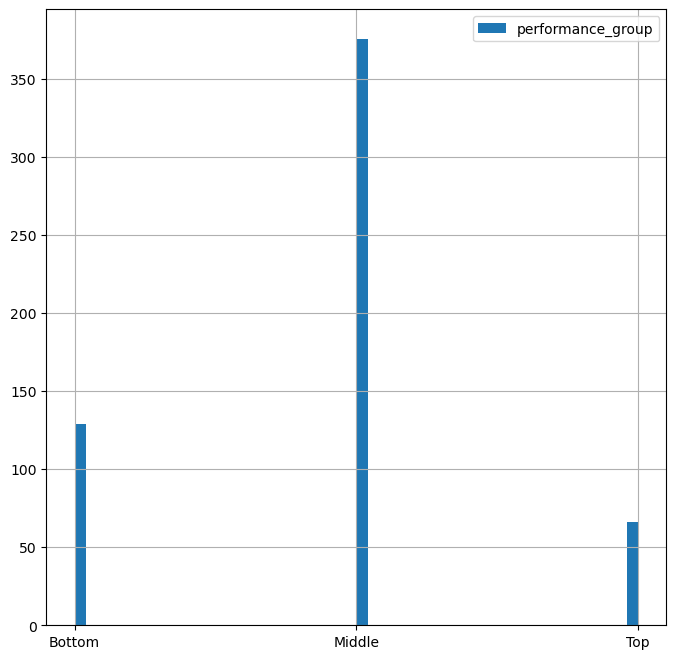

In [33]:
# Looking at the DV (performance_group) to consider the variation across the factors

sub_managers['performance_group'].hist(bins=50,legend=True,figsize=(8,8));

    # the  manager performance groups in size are from middle, bottom, and top - in that order

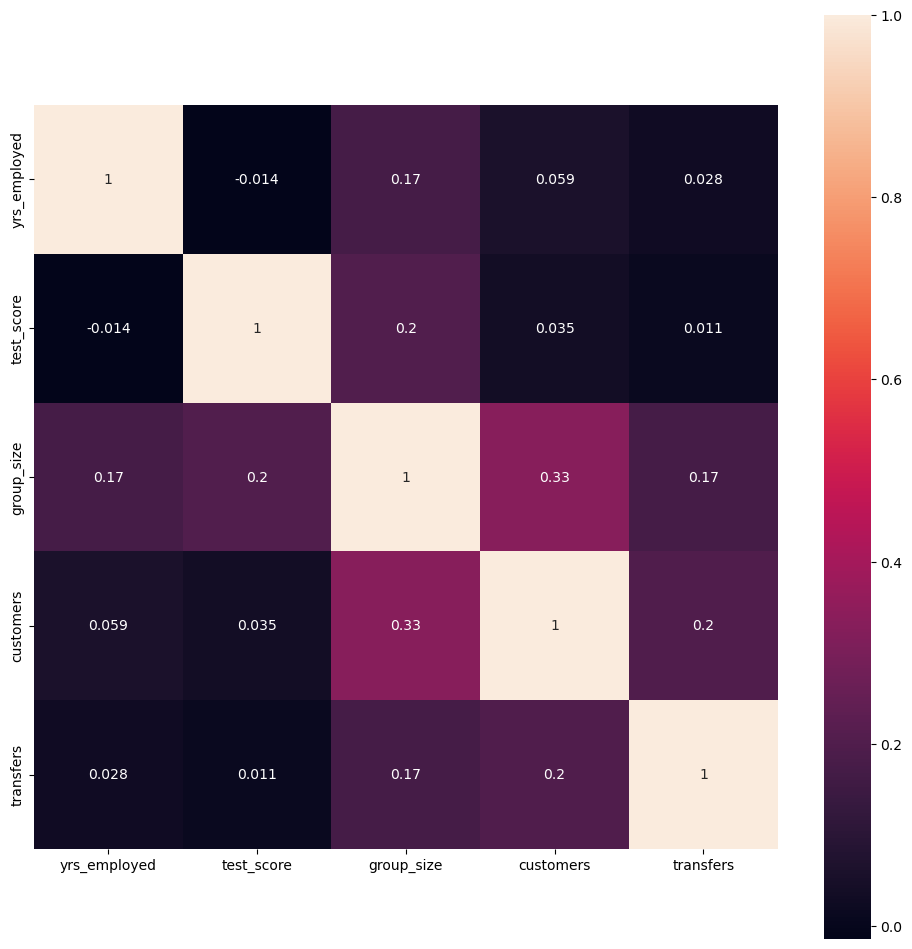

In [34]:
# Correlation matrix - none of the IV's have high levels of correlation 
#    rescheduled schedule and concern flag (categorical) variables are not included ---Unsure why it immediately took them out

plt.figure(figsize=(12, 12))
correlation = exog.select_dtypes(include = ['int64', 'float64']).corr()
sns.heatmap(correlation, vmax=1, annot=True,square=True);

In [37]:
# Run a little cross-tabulation between manager performance group and concern flags
#    to see if a manager has/has not been the subject of 
#    a complaint by a member of their group and 

tab = pd.crosstab(sub_managers['concern_flag'],sub_managers['performance_group'])
print(tab)

performance_group  Bottom  Middle  Top
concern_flag                          
N                     111     341   62
Y                      18      35    4


In [38]:
# Contingency table

table = sm.stats.Table(tab)  
print(table)

A 2x3 contingency table with counts:
[[111. 341.  62.]
 [ 18.  35.   4.]]


In [39]:
# no statistical significance in the ordinal association between filed complaints
#   and manager performance groups since low positive p-value (0.061)

rslt = table.test_ordinal_association()
print(rslt.pvalue)

0.06090430205271666


In [40]:
# running the local odds ratios 

print(table.local_oddsratios)

performance_group    Bottom    Middle  Top
concern_flag                              
N                  0.632942  0.628571  NaN
Y                       NaN       NaN  NaN


In [41]:
# running a cummulative odds ratio

print(table.cumulative_oddsratios)

performance_group    Bottom    Middle  Top
concern_flag                              
N                  0.596774  0.550213  NaN
Y                       NaN       NaN  NaN


In [42]:
# looking at marginal probabilities

table.marginal_probabilities

(concern_flag
 N    0.900175
 Y    0.099825
 dtype: float64,
 performance_group
 Bottom    0.225919
 Middle    0.658494
 Top       0.115587
 dtype: float64)

#### Step 4: Run a proportional odds logistic regression model against all relevant input variables

In [43]:
# proportional odds logistic model 

formula = 'performance_group ~ C(concern_flag) + C(reduced_schedule) + transfers + customers'
formula += '+ group_size + test_score + yrs_employed'
modfd_logit = OrderedModel.from_formula(formula, sub_managers , distr='logit')
resfd_logit = modfd_logit.fit(method='bfgs')
print(resfd_logit.summary())

Optimization terminated successfully.
         Current function value: 0.806232
         Iterations: 36
         Function evaluations: 39
         Gradient evaluations: 39
                             OrderedModel Results                             
Dep. Variable:      performance_group   Log-Likelihood:                -460.36
Model:                   OrderedModel   AIC:                             938.7
Method:            Maximum Likelihood   BIC:                             977.8
Date:                Mon, 09 Oct 2023                                         
Time:                        17:12:34                                         
No. Observations:                 571                                         
Df Residuals:                     562                                         
Df Model:                           7                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------

In [44]:
# Run predicted probabilities of being a member of one of the 3 manager performance groups

prob = pd.DataFrame(data = resfd_logit.predict(),
             columns = sub_managers['performance_group'].unique())

#  Looksies at top 10
prob.head(10)

,Bottom,Middle,Top
0,0.272119,0.658734,0.069147
1,0.248704,0.673897,0.077399
2,0.368848,0.585788,0.045365
3,0.097831,0.698286,0.203883
4,0.425714,0.538176,0.036110
5,0.244171,0.676669,0.079160
6,0.168136,0.711063,0.120801
7,0.262758,0.664955,0.072287
8,0.262337,0.665230,0.072433
9,0.135785,0.714012,0.150203


#### Step 5: Construct p-values for the coefficients and consider how to simplify the model to remove variables that do not impact the outcome

In [45]:
# Making P-values

summary_col([resfd_logit],
    stars = True,float_format ='%.3f',
        model_names= ['Logit'])

# The following variables have statistical significance: 
#    transfers, group size, test scores, employed, bottom/middle, middle/top

# The following variables do NOT have statistical significance:
#     flags of concern, time schedule of part/full-time, and the number of customers they see

,Logit
C(concern_flag)[T.Y],-0.273
,(0.302)
C(reduced_schedule)[T.Y],-0.209
,(0.208)
transfers,-0.212***
,(0.082)
customers,0.011
,(0.020)
group_size,0.095***
,(0.034)


In [46]:
# Since 3 of the variables had no stat significance, I will remove them from the data frame 
exog2 = sub_managers[["yrs_employed", "test_score", "group_size", "transfers"]] 

# Just checking!!
exog2.head(10)

,yrs_employed,test_score,group_size,transfers
0,4.6,205,10,0
1,5.3,227,14,0
2,5.2,227,10,0
3,4.9,273,19,0
4,4.9,227,17,5
5,4.3,159,10,0
6,4.8,250,13,0
7,5.0,326,13,3
8,4.4,152,10,0
9,4.5,326,11,0


In [48]:
# Re-run it but with the sub of the subset 

formula2 = 'performance_group ~ transfers + group_size + test_score + yrs_employed'
modfd_logit2 = OrderedModel.from_formula(formula2, sub_managers, distr='logit')
resfd_logit2 = modfd_logit2.fit(method='bfgs')
print(resfd_logit2.summary())

Optimization terminated successfully.
         Current function value: 0.808040
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27
                             OrderedModel Results                             
Dep. Variable:      performance_group   Log-Likelihood:                -461.39
Model:                   OrderedModel   AIC:                             934.8
Method:            Maximum Likelihood   BIC:                             960.9
Date:                Mon, 09 Oct 2023                                         
Time:                        17:25:01                                         
No. Observations:                 571                                         
Df Residuals:                     565                                         
Df Model:                           4                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

In [49]:
# Re-do the PValues, but with the sub subset

summary_col([resfd_logit2],
    stars = True,float_format ='%.3f',
        model_names= ['Logit'])

        # all variables are statistically significant now! 

,Logit
transfers,-0.218***
,(0.080)
group_size,0.106***
,(0.032)
test_score,0.004***
,(0.001)
yrs_employed,-0.938***
,(0.176)
Bottom/Middle,-3.589***
,(0.866)


#### Step 6: Calculate the odds ratios for your simplified model and write an interpretation of them

In [50]:
for attr in dir(resfd_logit2):
    if not attr.startswith('_'):
        print(attr)

aic
bic
bootstrap
bse
bsejac
bsejhj
conf_int
cov_kwds
cov_params
cov_type
covjac
covjhj
df_model
df_modelwc
df_resid
endog
exog
f_test
get_nlfun
get_prediction
hasconst
hessv
initialize
k_constant
llf
llnull
llr
llr_pvalue
load
mle_retvals
mle_settings
model
nobs
normalized_cov_params
params
pred_table
predict
prsquared
pvalues
remove_data
resid_prob
save
scale
score_obsv
summary
t_test
t_test_pairwise
tvalues
use_t
wald_test
wald_test_terms


In [51]:
# Model parameters to construct odds ratio for the new sub sub model

params = resfd_logit2.params                       
oddsratios = resfd_logit2.conf_int()               
oddsratios['Odds Ratio'] = params                 
oddsratios.columns = ['5%', '95%', 'Odds Ratio']  
np.exp(oddsratios) 

    # The odds a manger in a performance group moves from the middle to the top - 3.58%
    # the odds a manager moves from bottom to middle - 0.03% 
    # Hard to get across the initial threshold of movement from bottom to top level 
        # performance groups
    # But have a higher likelihood of moving to the top group from the middle. 
    # Limited movement overall though!

,5%,95%,Odds Ratio
transfers,0.687386,0.940610,0.804091
group_size,1.044593,1.184378,1.112292
test_score,1.001935,1.006427,1.004178
yrs_employed,0.277275,0.552914,0.391547
Bottom/Middle,0.005057,0.150858,0.027620
Middle/Top,3.255851,3.925861,3.575195


#### Step 7: Estimate the fit of the simplified model using a variety of metrics and perform tests to determine if the model is a good fit for the data

In [53]:
# Running predicted proabilities for each observation of the performance groups 
# hold all other variables and based on simplified sub-model

ref_prob2 = pd.DataFrame(data = resfd_logit2.predict(),
             columns = sub_managers['performance_group'].unique())

# Checking! 

ref_prob2.head(10)

        # Reading the results:
            # predicted probability of middle group is 70.2% 
            # all predicted probabilities signal that they fall in the middle performance group
            # middle group is also the largest population wise 

,Bottom,Middle,Top
0,0.232362,0.682941,0.084697
1,0.258057,0.667413,0.074530
2,0.326477,0.618895,0.054628
3,0.103859,0.701500,0.194640
4,0.340694,0.607888,0.051417
5,0.216782,0.691320,0.091898
6,0.180289,0.706746,0.112965
7,0.270988,0.658939,0.070072
8,0.238382,0.679478,0.082140
9,0.130140,0.712164,0.157696


In [56]:
resfd_logit2.pred_table()

row_0,0,1,2,All
col_0,,,,
0,5,124,0,129
1,5,367,4,376
2,0,65,1,66
All,10,556,5,571


The table is a little wonk, but its meant to show how well the model predicted which observations are in each managerial performance groups. The model has strong accuracy for middle categories, but tends to be more inconsistent with the bottom and top groups - as seen in the singular right prediction with the top group 

In [55]:
resfd_logit2.resid_prob  

array([-7.67638402e-01,  1.83527822e-01, -6.73523334e-01, -9.07809223e-02,
       -6.59305557e-01,  1.24883308e-01,  6.73239519e-02,  2.00916184e-01,
        1.56242593e-01, -2.75559897e-02, -9.07083195e-01,  9.03678142e-01,
        9.02873446e-02, -7.63518724e-01, -5.59968862e-01, -6.81116662e-01,
        1.07837287e-01, -9.21890616e-01, -6.00947658e-01,  2.51736422e-01,
       -5.52491791e-01,  1.40049945e-01, -6.46308464e-01,  1.94455549e-01,
       -2.88452727e-01,  2.71456966e-01,  1.76031527e-01,  8.19355283e-02,
        1.81194787e-01,  1.47487333e-01,  4.57789539e-02, -6.29455948e-01,
       -2.79592405e-02,  1.69049937e-01, -2.33764541e-01,  5.35129064e-02,
       -8.42141494e-01, -3.12819740e-02,  3.38973898e-01,  1.69075350e-01,
       -1.10370778e-01, -1.37172155e-02, -5.88410029e-01,  1.42324134e-01,
       -8.63069054e-02, -3.49841026e-01, -7.68707801e-01,  3.28027561e-01,
       -3.72704971e-02,  2.67862160e-01,  7.76601379e-02, -7.50096173e-01,
       -7.85083382e-01,  

#### Step 8: Construct new outcome variables and use a stratified binomial approach to determine if the proportional odds assumption holds for your simplified model. Are there any input variables for which you may be concerned that the assumption is violated? What would you consider doing in this case?

In [67]:
from pybrant.pybrant import BrantPy 

# Using the BrantPy model 
# I get consistent errors and I'm not sure what part I'm doing wrong 


model = sub_managers
by_var = False
results = BrantPy(sub_managers,by_var).TestResults()

print("Null Hypothesis H0: Parallel Regression Assumption holds")
results

    # only the years employed variable rejects the null hypothesis - aka does not
    # hold the parallel regression assumption

AttributeError: 'DataFrame' object has no attribute 'model'

In [68]:
# create binary variable for the performance groups (middle or top v. bottom) 

sub_managers['middle_plus'] = sub_managers['performance_group'].replace({'Bottom':0,'Middle':1,'Top':1}).cat.codes

# create binary variable for (top v. middle or bottom) 
sub_managers['top'] = sub_managers['performance_group'].replace({'Top':1,'Middle':0,'Bottom':0}).cat.codes
sub_managers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   performance_group  571 non-null    category
 1   yrs_employed       571 non-null    float64 
 2   test_score         571 non-null    int64   
 3   group_size         571 non-null    int64   
 4   customers          571 non-null    int64   
 5   transfers          571 non-null    int64   
 6   concern_flag       571 non-null    category
 7   reduced_schedule   571 non-null    category
 8   middle_plus        571 non-null    int8    
 9   top                571 non-null    int8    
dtypes: category(3), float64(1), int64(4), int8(2)
memory usage: 25.6 KB


/var/folders/c3/zdhqd95d3jd7ghmngnjvlq280000gn/T/ipykernel_10989/529626067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_managers['middle_plus'] = sub_managers['performance_group'].replace({'Bottom':0,'Middle':1,'Top':1}).cat.codes
/var/folders/c3/zdhqd95d3jd7ghmngnjvlq280000gn/T/ipykernel_10989/529626067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_managers['top'] = sub_managers['performance_group'].replace({'Top':1,'Middle':0,'Bottom':0}).cat.codes


In [69]:
# first logit model

formula3 = 'middle_plus ~ transfers + group_size + test_score + yrs_employed -1' 
middle_res = smf.logit(formula3,data=sub_managers).fit()
print(middle_res.summary())

Optimization terminated successfully.
         Current function value: 0.512701
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            middle_plus   No. Observations:                  571
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Oct 2023   Pseudo R-squ.:                 0.04042
Time:                        18:28:49   Log-Likelihood:                -292.75
converged:                       True   LL-Null:                       -305.08
Covariance Type:            nonrobust   LLR p-value:                 1.815e-05
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
transfers       -0.1852      0.091     -2.037      0.042      -0.363      -0.007
group_size       0.1206

In [70]:
# second logit model 

formula4 = 'top ~ transfers + group_size + test_score + yrs_employed -1' 
top_res = smf.logit(formula4,data=sub_managers).fit()
print(top_res.summary())

Optimization terminated successfully.
         Current function value: 0.327138
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    top   No. Observations:                  571
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Oct 2023   Pseudo R-squ.:                 0.08631
Time:                        18:29:03   Log-Likelihood:                -186.80
converged:                       True   LL-Null:                       -204.44
Covariance Type:            nonrobust   LLR p-value:                 1.059e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
transfers       -0.3069      0.140     -2.187      0.029      -0.582      -0.032
group_size       0.1277

In [71]:
# Subtract the coefficients of the two models 
coeff_comparison = pd.DataFrame({'middle_plus': middle_res.params,
                                      'top': top_res.params,
                                     'diff': top_res.params - middle_res.params 
                                      }
                                     )
 
coeff_comparison 

    # No differfences in assumptions so the first coefficient and last 
    # coeffiencet violates the proportional odds assumption, and the middle 2 coefficients 
    # don't 

,middle_plus,top,diff
transfers,-0.185200,-0.306894,-0.121694
group_size,0.120636,0.127706,0.007070
test_score,0.005040,0.004470,-0.000570
yrs_employed,-0.260681,-1.000935,-0.740255


#### Step 9: Write a full report on your model intended for an audience of people with limited knowledge of statistics:

Based on the simplified model and reflecting on the statistical results and the assumption tests of the stratified models, I know that all of my coefficients are statistically significant at the 0.05 percent level. This directly suggests that they do indeed affect managerial performance. 

This indicates that once a manager is performing within the exceptions of the middle category of performance, it's more likely that will be able to progress to being a top-performing manager. 

I conclude that it's easier for managers to progress to the top performance category once they've hit the middle group. All independent variables are positive and significant effects on the dependent variable, employees who oversee and receive a high test score on exams administrated to all managers produce outcomes on managerial performance   

Increase in number of employees in group for which the manager responsible for increases odds of manager improving their performance. Increase in test scores increases odds of managers improving their performance to 1% points. Increases in years worked increases odds of manager improving their performance.  